In [1]:
%load_ext autoreload
%autoreload 2

# Data


In [2]:
from thesis_work.data import load_data_splits

train_df, valid_df, test_df = load_data_splits(protein_type="kinase")

print(train_df.shape, valid_df.shape, test_df.shape)

Skipped loading some Tensorflow models, missing a dependency. No module named 'tensorflow'
Skipped loading modules with pytorch-geometric dependency, missing a dependency. No module named 'torch_geometric'
Skipped loading modules with pytorch-geometric dependency, missing a dependency. cannot import name 'DMPNN' from 'deepchem.models.torch_models' (/home/ilker/Documents/MyRepos/thesis-work/.venv/lib/python3.10/site-packages/deepchem/models/torch_models/__init__.py)
Skipped loading modules with pytorch-lightning dependency, missing a dependency. No module named 'pytorch_lightning'
Skipped loading some Jax models, missing a dependency. No module named 'jax'


(53047, 2) (6631, 2) (6631, 2)


## KFold


In [2]:
from thesis_work.cv.split import create_folds, get_kfold_experiment_indices


length = 50
fold_list = create_folds(length=length)
fold_list

[[17, 8, 34, 3, 31, 12, 28, 20, 2],
 [15, 1, 41, 49, 47, 40, 36, 22, 43],
 [14, 0, 24, 16, 45, 9, 27, 38],
 [46, 5, 39, 21, 32, 37, 29, 4],
 [19, 23, 30, 25, 13, 42, 26, 10],
 [7, 11, 18, 44, 48, 33, 35, 6]]

In [12]:
experiment_indices = get_kfold_experiment_indices(length=length)

for experiment_index in experiment_indices:
    train_df, valid_df, test_df = experiment_index
    print(train_df, valid_df, test_df)

[15, 1, 41, 49, 47, 40, 36, 22, 43, 14, 0, 24, 16, 45, 9, 27, 38, 46, 5, 39, 21, 32, 37, 29, 4, 19, 23, 30, 25, 13, 42, 26, 10] [17, 8, 34, 3, 31, 12, 28, 20, 2] [7, 11, 18, 44, 48, 33, 35, 6]
[17, 8, 34, 3, 31, 12, 28, 20, 2, 14, 0, 24, 16, 45, 9, 27, 38, 46, 5, 39, 21, 32, 37, 29, 4, 19, 23, 30, 25, 13, 42, 26, 10] [15, 1, 41, 49, 47, 40, 36, 22, 43] [7, 11, 18, 44, 48, 33, 35, 6]
[17, 8, 34, 3, 31, 12, 28, 20, 2, 15, 1, 41, 49, 47, 40, 36, 22, 43, 46, 5, 39, 21, 32, 37, 29, 4, 19, 23, 30, 25, 13, 42, 26, 10] [14, 0, 24, 16, 45, 9, 27, 38] [7, 11, 18, 44, 48, 33, 35, 6]
[17, 8, 34, 3, 31, 12, 28, 20, 2, 15, 1, 41, 49, 47, 40, 36, 22, 43, 14, 0, 24, 16, 45, 9, 27, 38, 19, 23, 30, 25, 13, 42, 26, 10] [46, 5, 39, 21, 32, 37, 29, 4] [7, 11, 18, 44, 48, 33, 35, 6]
[17, 8, 34, 3, 31, 12, 28, 20, 2, 15, 1, 41, 49, 47, 40, 36, 22, 43, 14, 0, 24, 16, 45, 9, 27, 38, 46, 5, 39, 21, 32, 37, 29, 4] [19, 23, 30, 25, 13, 42, 26, 10] [7, 11, 18, 44, 48, 33, 35, 6]


In [9]:
import numpy as np
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5, shuffle=False)

# data = np.arange(50)
data = [item for sublist in fold_list[:5] for item in sublist]
data = np.array(data)

for train, test in kfold.split(data):
    print("train: %s, test: %s" % (data[train], data[test]))

train: [15  1 41 49 47 40 36 22 43 14  0 24 16 45  9 27 38 46  5 39 21 32 37 29
  4 19 23 30 25 13 42 26 10], test: [17  8 34  3 31 12 28 20  2]
train: [17  8 34  3 31 12 28 20  2 14  0 24 16 45  9 27 38 46  5 39 21 32 37 29
  4 19 23 30 25 13 42 26 10], test: [15  1 41 49 47 40 36 22 43]
train: [17  8 34  3 31 12 28 20  2 15  1 41 49 47 40 36 22 43 46  5 39 21 32 37
 29  4 19 23 30 25 13 42 26 10], test: [14  0 24 16 45  9 27 38]
train: [17  8 34  3 31 12 28 20  2 15  1 41 49 47 40 36 22 43 14  0 24 16 45  9
 27 38 19 23 30 25 13 42 26 10], test: [46  5 39 21 32 37 29  4]
train: [17  8 34  3 31 12 28 20  2 15  1 41 49 47 40 36 22 43 14  0 24 16 45  9
 27 38 46  5 39 21 32 37 29  4], test: [19 23 30 25 13 42 26 10]


# Model


In [2]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
from thesis_work.chemberta.utils import get_model


model_type = "DeepChem/ChemBERTa-77M-MLM"
# model: ClassificationModel = get_model(model_type=model_type)

model_args = ClassificationArgs(
    evaluate_each_epoch=True,
    evaluate_during_training_verbose=True,
    no_save=True,
    num_train_epochs=10,
    # overwrite_output_dir=True,
    # auto_weights=True, # NOTE: Not working
    # NOTE: Necessary for training outside of Colab
    use_multiprocessing=False,
    # dataloader_num_workers=0,
    # process_count=1,
    use_multiprocessing_for_evaluation=False,
)

model_args_dict = {"output_hidden_states": True}

model = ClassificationModel(
    model_type="roberta",
    model_name=model_type,
    # args=model_args,
    args=model_args_dict,
    # use_cuda=False,
)

Some weights of the model checkpoint at DeepChem/ChemBERTa-77M-MLM were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.decoder.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MLM and are newly initialized: ['classifier.out_proj.weight', 'classifier.out

In [4]:
model.__dict__

{'args': ClassificationArgs(adafactor_beta1=None, adafactor_clip_threshold=1.0, adafactor_decay_rate=-0.8, adafactor_eps=(1e-30, 0.001), adafactor_relative_step=True, adafactor_scale_parameter=True, adafactor_warmup_init=True, adam_betas=(0.9, 0.999), adam_epsilon=1e-08, best_model_dir='outputs/best_model', cache_dir='cache_dir/', config={}, cosine_schedule_num_cycles=0.5, custom_layer_parameters=[], custom_parameter_groups=[], dataloader_num_workers=0, do_lower_case=False, dynamic_quantize=False, early_stopping_consider_epochs=False, early_stopping_delta=0, early_stopping_metric='eval_loss', early_stopping_metric_minimize=True, early_stopping_patience=3, encoding=None, eval_batch_size=8, evaluate_during_training=False, evaluate_during_training_silent=True, evaluate_during_training_steps=2000, evaluate_during_training_verbose=True, evaluate_each_epoch=True, fp16=True, gradient_accumulation_steps=1, learning_rate=4e-05, local_rank=-1, logging_steps=50, loss_type=None, loss_args={}, manu

## Silhouette samples


In [ ]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
) 

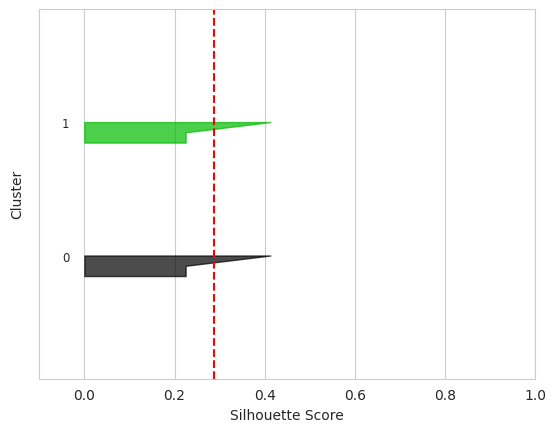

In [8]:
from thesis_work.clustering.evaluation import silhouette_samples_plot

import numpy as np

X = np.array([[1, 2], [1, 4], [1, 0], [4, 2], [4, 4], [4, 0]], dtype=np.float32)
cluster_labels = np.array([0, 0, 0, 1, 1, 1])

silhouette_samples_plot(X, cluster_labels, device="cpu")

## Agglomerative cudaErrorInvalidValue:invalid argument

- Github issue: https://github.com/rapidsai/cuml/issues/4424

In [1]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
import cudf
import cupy
from cuml.cluster import AgglomerativeClustering
from cuml.datasets import make_blobs



In [3]:
n_samples = 300_000
n_features = 16

n_clusters = 10
random_state = 0

device_data, device_labels = make_blobs(n_samples=n_samples,
n_features=n_features,
centers=n_clusters,
random_state=random_state,
cluster_std=0.1)

device_data = cudf.DataFrame(device_data)
device_labels = cudf.Series(device_labels)

for n_clusters in range(10, 1000, 20):
    hc_cuml = AgglomerativeClustering(n_clusters=n_clusters, affinity="euclidean", linkage="single",connectivity='knn',n_neighbors=10)
    hc_cuml.fit(device_data)

## RFC

- Link: https://github.com/rapidsai/cuml/issues/3568

In [2]:
import numpy as np
from cuml.ensemble import RandomForestClassifier as cuRFC

X = np.random.normal(size=(300_000,16)).astype(np.float32)
y = np.asarray([0,1]*150_000, dtype=np.int32)

cuml_model = cuRFC()
cuml_model.fit(X,y)
cuml_predict = cuml_model.predict(X)

print("Predicted labels : ", cuml_predict)

Predicted labels :  [0. 1. 0. ... 1. 0. 1.]


In [4]:
import cuml
import numpy as np
from scipy import sparse

m = 25_000
n = 20
density = 0.025
mn = int(density*m*n)
row = np.random.randint(low=0,high=m,size=mn,dtype='int32')
col = np.random.randint(low=0,high=n,size=mn,dtype='int32')
data = np.random.rand(mn).astype('float32')
x = sparse.coo_matrix((data, (row, col)), shape=(m,n))
x = sparse.csr_matrix(x)
umap = cuml.UMAP()
umap.fit(x)

UMAP()